## Outline

[Miscellaneous EDA](#Miscellaneous-EDA')

[Modelling the Fatality Rate](#Modelling-the-Fatality-Rate')

[Simplified EPI Model with Asymptomatic without Hospital Compartment](#Simplified-EPI-Model-with-Asymptomatic-without-Hospital-Compartment') 

## Miscellaneous EDA

In [2]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ibm_boto3
from botocore.client import Config
import pandas as pd

sns.set()

plt.rcParams['figure.figsize'] = [14, 8]

In [18]:
!pip install numdifftools
!pip install lmfit

import numdifftools
import lmfit

     |████████████████████████████████| 962kB 6.9MB/s eta 0:00:01
     |████████████████████████████████| 266kB 8.3MB/s eta 0:00:01
     |████████████████████████████████| 61kB 25.8MB/s eta 0:00:01
     |████████████████████████████████| 20.1MB 29.6MB/s eta 0:00:01
     |████████████████████████████████| 256kB 43.6MB/s eta 0:00:01
  Stored in directory: /home/dsxuser/.cache/pip/wheels/ef/22/8d/6cd9c0af36f501cfb248673b05dad5d2c27504951d55519acb
  Stored in directory: /home/dsxuser/.cache/pip/wheels/1c/53/1b/28d929700c9633b1786a4982e6db564ec8326a8930234dcc19
Successfully built lmfit asteval
ERROR: tensorflow 1.13.1 requires tensorboard<1.14.0,>=1.13.0, which is not installed.
ERROR: autoai-libs 1.10.5 has requirement pandas>=0.24.2, but you'll have pandas 0.24.1 which is incompatible.
  Found existing installation: numpy 1.15.4
    Uninstalling numpy-1.15.4:
      Successfully uninstalled numpy-1.15.4


In [3]:
cos_credentials  = ibm_boto3.client(service_name='s3',
    
                                ibm_api_key_id = 'fnL2pDJ7hOxPfQuNJ0MJDs9Qf4PVodwDaheJ8blAUDMN',
    
                                ibm_auth_endpoint = "https://iam.ng.bluemix.net/oidc/token",
    
                                config = Config(signature_version='oauth'),
                                    
                                endpoint_url = 'https://s3-api.us-geo.objectstorage.service.networklayer.com')

BUCKET_NAME = 'estimatetruecovidrates-donotdelete-pr-qhfbypwsbmv0pz'

demo_files = ['WestVlaanderen.csv', 'VlaamsBrabant.csv', 'Luxembourg.csv', 'OostVlaanderen.csv', 'Namur.csv', 'Brussels.csv', 'BrabantWallon.csv', 
              
              'Antwerpen.csv', 'Liege.csv', 'Hainaut.csv', 'Limburg.csv']

for filename in demo_files:
    
    print('Reading|', filename)
    
    cos_credentials.download_file(Bucket = BUCKET_NAME, Filename=filename, Key = filename)
    
demographics = pd.DataFrame()

for file in demo_files:
    
    dd = pd.read_csv(file, encoding = 'latin-1')
    
    dd['province'] = file.split('.')[0]
    
    demographics = pd.concat([demographics, dd])

print(demographics.shape)

demographics.rename(columns  = {'Leeftijdsklasse' : 'age-category', 'Geslacht': 'Sex', 'SumOfSumOfAantal': 'population'}, inplace = True)

demographics.loc[demographics['province'] == 'Liege', 'province'] = 'Liège'

demographics['total_population'] = demographics['population'].groupby(demographics['province']).transform('sum')

demographics.head()

Reading| WestVlaanderen.csv
Reading| VlaamsBrabant.csv
Reading| Luxembourg.csv
Reading| OostVlaanderen.csv
Reading| Namur.csv
Reading| Brussels.csv
Reading| BrabantWallon.csv
Reading| Antwerpen.csv
Reading| Liege.csv
Reading| Hainaut.csv
Reading| Limburg.csv
(462, 4)


,age-category,Sex,population,province,total_population
0,55-59 year,Men,44190,WestVlaanderen,1195659
1,5-9 year,Men,31374,WestVlaanderen,1195659
2,70-74 year,Men,32274,WestVlaanderen,1195659
3,60-64 year,Men,40636,WestVlaanderen,1195659
4,0-4 jaar,Men,28744,WestVlaanderen,1195659


In [3]:
## beta = number of people an infected person infects per day

## gamma = the number of infected people recovering per day (1/D) where D = the number of days to recover 

## delta = 1 / the incubation period

## zeta = 1 / the delay for an infected person to die (1 / 30)

## p_i_r = the probability to recover from the disease 

## p_i_d = 1 - p-i_r is the the probability to die from the disease 

## R0: the reproduction rate, the total number of people an infected person infects

## P_E_I is the probability to move from Exposed to Infected

## delta_1 = The number of people moving from Exposed to Infected per day

## delta_2 = The number of people moving from Exposed to Asymptotic per day 

## lambda_1 = The number of people moving from Asymptomatic to Reocovered per day

# N = 1208409

# # beta = 5

# gamma = 1 / 4

# delta = 1 / 5

# zeta = 1 / 9

# p_i_r = 0.92

# P_E_I = 0.25

# delta_1 = 53/364

# delta_2 = 53/364

# lambda_1 = 56/364

# R0 = beta / gamma

# R0_init, R0_end, x0, k  = 5, 0.8 , 100, 0.2

# S0, E0, A0, I0, R0, D0 = N - 1, 1, 0, 0 , 0, 0

# y_0 = S0, E0, A0, I0, R0, D0


In [4]:
demographics[demographics['province']=='Flanders']['population'].sum()

0

In [5]:
demographics['province'].unique()

array(['WestVlaanderen', 'VlaamsBrabant', 'Luxembourg', 'OostVlaanderen',
       'Namur', 'Brussels', 'BrabantWallon', 'Antwerpen', 'Liège',
       'Hainaut', 'Limburg'], dtype=object)

In [4]:
## Reading Data 
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_f3aa31d5b1f646af94bd1b92c85cc9a8 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='fnL2pDJ7hOxPfQuNJ0MJDs9Qf4PVodwDaheJ8blAUDMN',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_f3aa31d5b1f646af94bd1b92c85cc9a8.get_object(Bucket='estimatetruecovidrates-donotdelete-pr-qhfbypwsbmv0pz',Key='COVID19BE_MORT.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

num_deaths = pd.read_csv(body)

print(num_deaths.head())

## Reading Number of cases

body = client_f3aa31d5b1f646af94bd1b92c85cc9a8.get_object(Bucket='estimatetruecovidrates-donotdelete-pr-qhfbypwsbmv0pz',Key='COVID19BE_CASES_AGESEX.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

num_cases = pd.read_csv(body, encoding = 'latin-1')
print(num_cases.head())

## Hospital Admissions

body = client_f3aa31d5b1f646af94bd1b92c85cc9a8.get_object(Bucket='estimatetruecovidrates-donotdelete-pr-qhfbypwsbmv0pz',Key='COVID19BE_HOSP.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

hospital_adm = pd.read_csv(body, encoding = 'latin-1')

print(hospital_adm.head())

         DATE    REGION AGEGROUP SEX  DEATHS
0  2020-03-10  Brussels      85+   F       1
1  2020-03-11  Flanders      85+   F       1
2  2020-03-11  Brussels    75-84   M       1
3  2020-03-11  Brussels      85+   F       1
4  2020-03-12  Brussels    75-84   M       1
         DATE  PROVINCE    REGION AGEGROUP SEX  CASES
0  2020-03-01  Brussels  Brussels    10-19   M      1
1  2020-03-01  Brussels  Brussels    10-19   F      1
2  2020-03-01  Brussels  Brussels    20-29   M      1
3  2020-03-01  Brussels  Brussels    30-39   F      1
4  2020-03-01  Brussels  Brussels    40-49   F      1
         DATE   PROVINCE    REGION  NR_REPORTING  TOTAL_IN  TOTAL_IN_ICU  \
0  2020-03-15  Antwerpen  Flanders            14        50             9   
1  2020-03-15   Brussels  Brussels            14        58            11   
2  2020-03-15    Hainaut  Wallonia            15        56            13   
3  2020-03-15    Limburg  Flanders             7        20             6   
4  2020-03-15      Liège  

In [5]:
num_cases.head()

,DATE,PROVINCE,REGION,AGEGROUP,SEX,CASES
0,2020-03-01,Brussels,Brussels,10-19,M,1
1,2020-03-01,Brussels,Brussels,10-19,F,1
2,2020-03-01,Brussels,Brussels,20-29,M,1
3,2020-03-01,Brussels,Brussels,30-39,F,1
4,2020-03-01,Brussels,Brussels,40-49,F,1


In [6]:
hospital_adm.head()

,DATE,PROVINCE,REGION,NR_REPORTING,TOTAL_IN,TOTAL_IN_ICU,TOTAL_IN_RESP,TOTAL_IN_ECMO,NEW_IN,NEW_OUT
0,2020-03-15,Antwerpen,Flanders,14,50,9,4,0,8,8
1,2020-03-15,Brussels,Brussels,14,58,11,8,0,7,2
2,2020-03-15,Hainaut,Wallonia,15,56,13,11,1,26,1
3,2020-03-15,Limburg,Flanders,7,20,6,3,0,9,3
4,2020-03-15,Liège,Wallonia,12,22,2,1,0,4,1


Text(0.5, 1.0, 'Confirmed cases By Date')

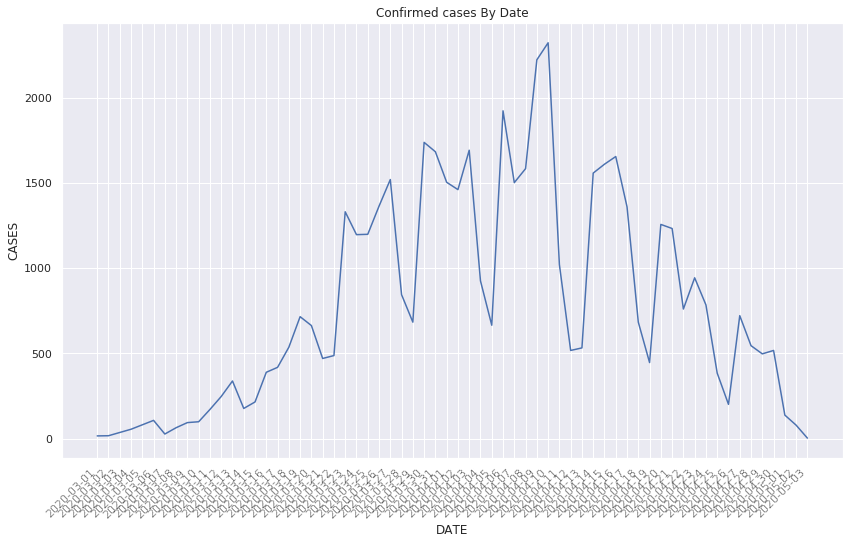

In [7]:
# from plotly import express as px

count_cases_reg = num_cases.groupby(['DATE'])['CASES'].sum().reset_index()

count_cases_reg['CASES'] = count_cases_reg['CASES'].astype('int')

ax = sns.lineplot(x = "DATE", y = "CASES", data = count_cases_reg)

plt.xticks(rotation = 45, horizontalalignment = 'right',  fontweight = 'light' )

plt.title("Confirmed cases By Date")

In [10]:
num_cases['REGION'].unique()

array(['Brussels', 'Wallonia', 'Flanders', nan], dtype=object)

Text(0.5, 1.0, 'Confirmed cases By Date in Wallonia')

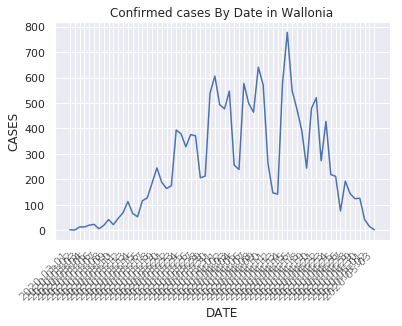

In [11]:
count_cases_wallonia = num_cases[num_cases['REGION']=='Wallonia'].groupby(['DATE'])['CASES'].sum().reset_index()

count_cases_wallonia['CASES'] = count_cases_wallonia['CASES'].astype('int')

ax = sns.lineplot(x = "DATE", y = "CASES", data = count_cases_wallonia)

plt.xticks(rotation = 45, horizontalalignment = 'right',  fontweight = 'light' )

plt.title("Confirmed cases By Date in Wallonia")

Text(0.5, 1.0, 'Confirmed cases By Date in Flanders')

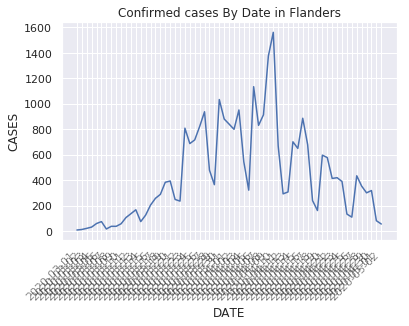

In [12]:
count_cases_flanders = num_cases[num_cases['REGION']=='Flanders'].groupby(['DATE'])['CASES'].sum().reset_index()

count_cases_flanders['CASES'] = count_cases_flanders['CASES'].astype('int')

ax = sns.lineplot(x = "DATE", y = "CASES", data = count_cases_flanders)

plt.xticks(rotation = 45, horizontalalignment = 'right',  fontweight = 'light' )

plt.title("Confirmed cases By Date in Flanders")

In [13]:
count_cases_flanders.head()

,DATE,CASES
0,2020-03-01,8
1,2020-03-02,12
2,2020-03-03,21
3,2020-03-04,31
4,2020-03-05,59


Text(0.5, 1.0, 'Confirmed cases/Susceptible Population By Date in Flanders')

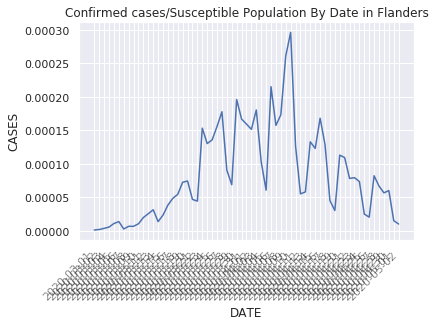

In [14]:
flanders_provinces = num_cases[num_cases['REGION']=='Flanders']['PROVINCE'].unique().tolist()

flanders_pop = demographics[demographics['province'].isin(flanders_provinces)]

susceptible_flanders_pop = flanders_pop['population'].sum()*0.8

incidence_flanders = count_cases_flanders.copy()

incidence_flanders['CASES'] = count_cases_flanders['CASES']/susceptible_flanders_pop

ax = sns.lineplot(x = "DATE", y = "CASES", data = incidence_flanders)

plt.xticks(rotation = 45, horizontalalignment = 'right',  fontweight = 'light' )

plt.title("Confirmed cases/Susceptible Population By Date in Flanders")

Text(0.5, 1.0, 'Confirmed cases By Date in Brussels')

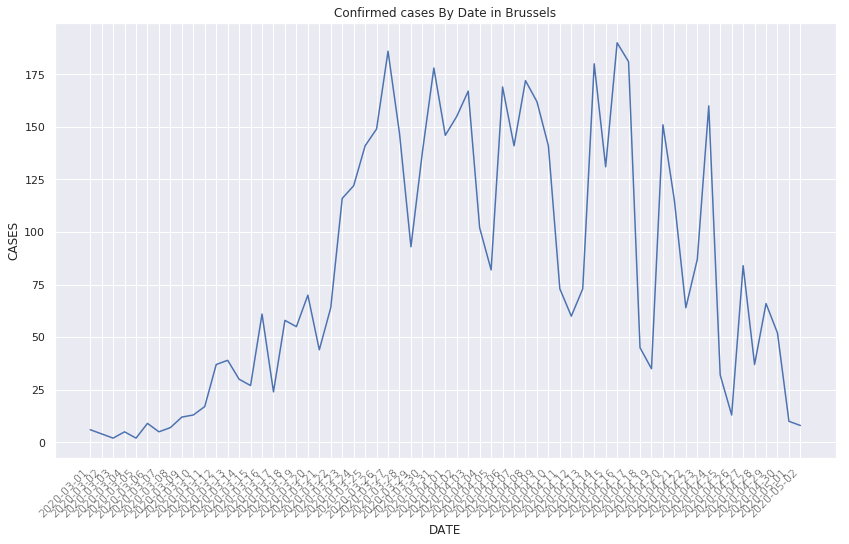

In [17]:
brussels_provinces = num_cases[num_cases['REGION']=='Brussels']['PROVINCE'].unique().tolist()

brussels_pop = demographics[demographics['province'].isin(brussels_provinces)]

susceptible_brussels_pop = brussels_pop['population'].sum()*0.8

count_cases_brussels = num_cases[num_cases['REGION']=='Brussels'].groupby(['DATE'])['CASES'].sum().reset_index()

count_cases_brussels['CASES'] = count_cases_brussels['CASES'].astype('int')

ax = sns.lineplot(x = "DATE", y = "CASES", data = count_cases_brussels)

plt.xticks(rotation = 45, horizontalalignment = 'right',  fontweight = 'light' )

plt.title("Confirmed cases By Date in Brussels")

In [39]:
hospital_adm.head()

,DATE,PROVINCE,REGION,NR_REPORTING,TOTAL_IN,TOTAL_IN_ICU,TOTAL_IN_RESP,TOTAL_IN_ECMO,NEW_IN,NEW_OUT
0,2020-03-15,Antwerpen,Flanders,14,50,9,4,0,8,8
1,2020-03-15,Brussels,Brussels,14,58,11,8,0,7,2
2,2020-03-15,Hainaut,Wallonia,15,56,13,11,1,26,1
3,2020-03-15,Limburg,Flanders,7,20,6,3,0,9,3
4,2020-03-15,Liège,Wallonia,12,22,2,1,0,4,1


Text(0.5, 1.0, 'Total_IN Hospitals By Date in Brussels')

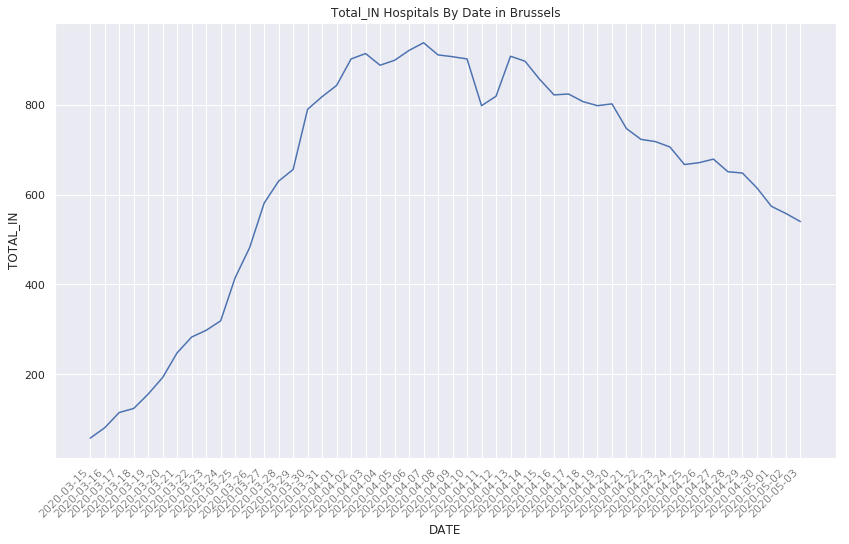

In [11]:
hosp_total_in_brussels = hospital_adm[hospital_adm['REGION']=='Brussels'].groupby(['DATE'])['TOTAL_IN'].sum().reset_index()

hosp_total_in_brussels['TOTAL_IN'] = hosp_total_in_brussels['TOTAL_IN'].astype('int')

ax = sns.lineplot(x = "DATE", y = "TOTAL_IN", data = hosp_total_in_brussels)

plt.xticks(rotation = 45, horizontalalignment = 'right',  fontweight = 'light' )

plt.title("Total_IN Hospitals By Date in Brussels")

Text(0.5, 1.0, 'Total_IN ICU By Date in Brussels')

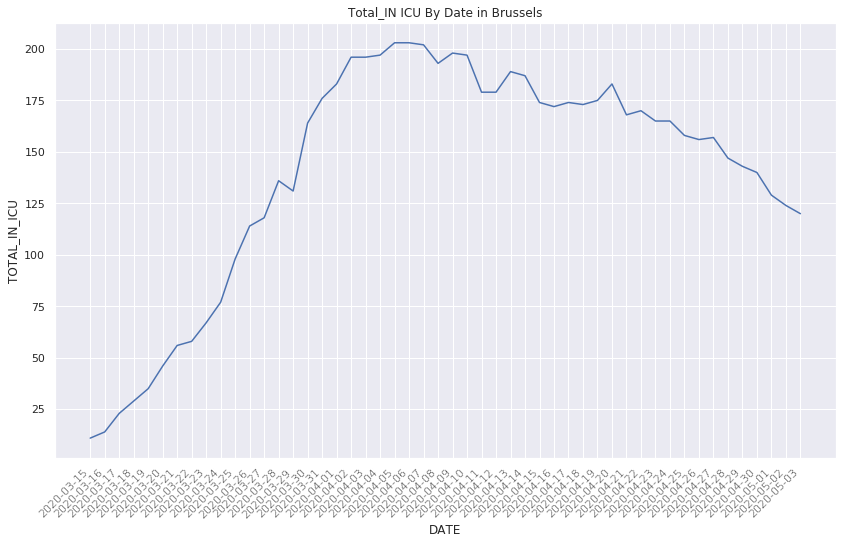

In [12]:
hosp_total_icu_brussels = hospital_adm[hospital_adm['REGION']=='Brussels'].groupby(['DATE'])['TOTAL_IN_ICU'].sum().reset_index()

hosp_total_icu_brussels['TOTAL_IN_ICU'] = hosp_total_icu_brussels['TOTAL_IN_ICU'].astype('int')

ax = sns.lineplot(x = "DATE", y = "TOTAL_IN_ICU", data = hosp_total_icu_brussels)

plt.xticks(rotation = 45, horizontalalignment = 'right',  fontweight = 'light' )

plt.title("Total_IN ICU By Date in Brussels")

Text(0.5, 1.0, 'Deaths cases By Date')

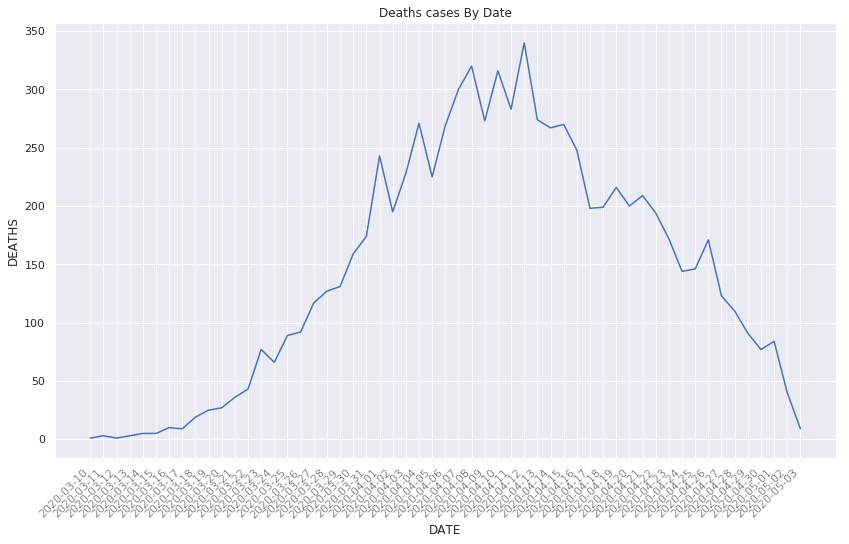

In [20]:
# from plotly import express as px

count_deaths_reg = num_deaths.groupby(['DATE'])['DEATHS'].sum().reset_index()

count_deaths_reg.head()

ax = sns.lineplot(x = "DATE", y = "DEATHS", data = count_deaths_reg)

plt.xticks(rotation = 45, horizontalalignment = 'right',  fontweight = 'light' )

plt.title("Deaths cases By Date")

In [37]:

body = client_f3aa31d5b1f646af94bd1b92c85cc9a8.get_object(Bucket='estimatetruecovidrates-donotdelete-pr-qhfbypwsbmv0pz',Key='COVID19BE_HOSP.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data_hosp = pd.read_csv(body, encoding = 'latin-1')

data_hosp.head()


,DATE,PROVINCE,REGION,NR_REPORTING,TOTAL_IN,TOTAL_IN_ICU,TOTAL_IN_RESP,TOTAL_IN_ECMO,NEW_IN,NEW_OUT
0,2020-03-15,Antwerpen,Flanders,14,50,9,4,0,8,8
1,2020-03-15,Brussels,Brussels,14,58,11,8,0,7,2
2,2020-03-15,Hainaut,Wallonia,15,56,13,11,1,26,1
3,2020-03-15,Limburg,Flanders,7,20,6,3,0,9,3
4,2020-03-15,Liège,Wallonia,12,22,2,1,0,4,1


Text(0.5, 1.0, 'New admissions By Date')

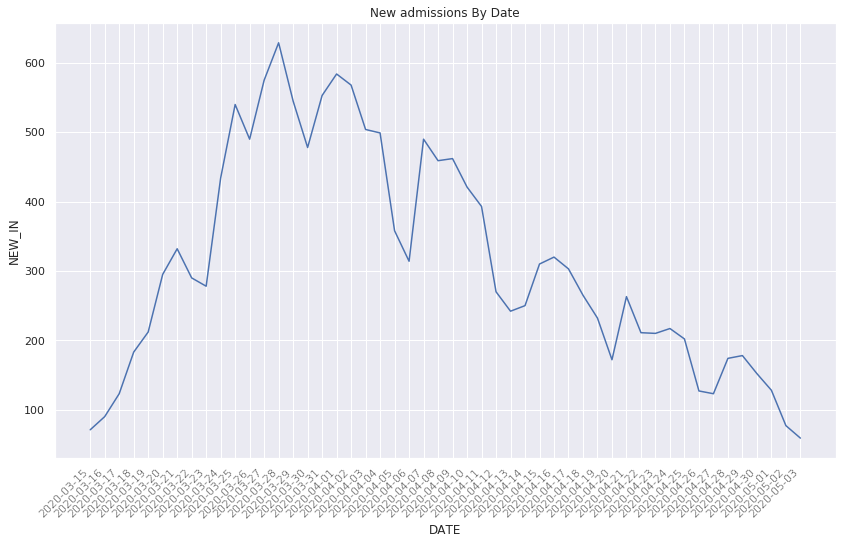

In [38]:
# from plotly import express as px

count_new_in = data_hosp.groupby(['DATE'])['NEW_IN'].sum().reset_index()

count_new_in.head()

ax = sns.lineplot(x = "DATE", y = "NEW_IN", data = count_new_in)

plt.xticks(rotation = 45, horizontalalignment = 'right',  fontweight = 'light' )

plt.title("New admissions By Date")

In [ ]:
data_hosp.head()

In [ ]:
# from plotly import express as px

count_hosp = data_hosp.groupby(['DATE'])['TOTAL_IN'].sum().reset_index()

count_hosp.head()

ax = sns.lineplot(x = "DATE", y = "TOTAL_IN", data = count_hosp)

plt.xticks(rotation = 45, horizontalalignment = 'right',  fontweight = 'light' )

plt.title("Total IN By Date")

## Modelling the Fatality Rate
<a id='Modelling-the-Fatality-Rate'></a>

In [ ]:
demographics['new_age_category'] = demographics['age-category'].apply(lambda x: '0-10 years' if x in ['0-4 jaar', '5-9 year']
                                                                           
                                                                            else '10-40 years' if x in ['10-14 year', '15-19 year', '20-24 year', '25-29 year', '30-34 year', '35-39 year'] 
                                                                           
                                                                            else '40-60 years' if x in ['40-44 year', '45-49 year', '50-54 year', '55-59 year'] 
                                                                          
                                                                            else '60-80 years' if x in ['60-64 year', '65-69 year', '70-74 year', '75-79 year']
                                                                           
                                                                            else '+80 years')

demo_age_province = demographics.groupby(['province', 'new_age_category'])['population'].agg({'agg_age_province': 'sum'})

demo_age_province = demo_age_province.groupby(level = 0).apply(lambda x : x/float(x.sum())).reset_index()

demo_age_brussels = demo_age_province[demo_age_province['province']=='Brussels']

demo_age_brussels_dict = dict(zip(demo_age_brussels['new_age_category'], demo_age_brussels['agg_age_province']))

## Adding Mortality Rates Per Age Group (these figures are randomly chosen and should be refined)

mortality_per_age_group = {'0-10 years': 0.01, '10-40 years': 0.03, '40-60 years': 0.05, '60-80 years': 0.08, '+80 years': 0.1}

alpha_0 = sum([demo_age_brussels_dict[i] * mortality_per_age_group[i] for i in demo_age_brussels_dict.keys()])

print(alpha_0)

## Modelling the Reproduction Rate

In [11]:
def reproduction_rate(t) :
    
    ## modelling the lockdown effect on the reproduction rate with a logistic function
    '''
    Parameters:
    -----------
        R0_init: the initial reproduction rate
        R0_end: the final reproduction rate
        k: the strength of the decrease post lockdown
        x0: the date of steepest decline in the reproduction rate (the lockdown is enforced globally)
    '''
    
    return (R0_init - R0_end)/(1 + np.exp(-k * (-t + x0))) +  R0_end


def beta(t):
    
    return reproduction_rate(t) * gamma

## Only for SIR Model. Otherwise linearize the equations. 


## Simplified EPI Model with Asymptomatic without Hospital Compartment :
<a id='Simplified-EPI-Model-with-Asymptomatic-without-Hospital-Compartment'></a>

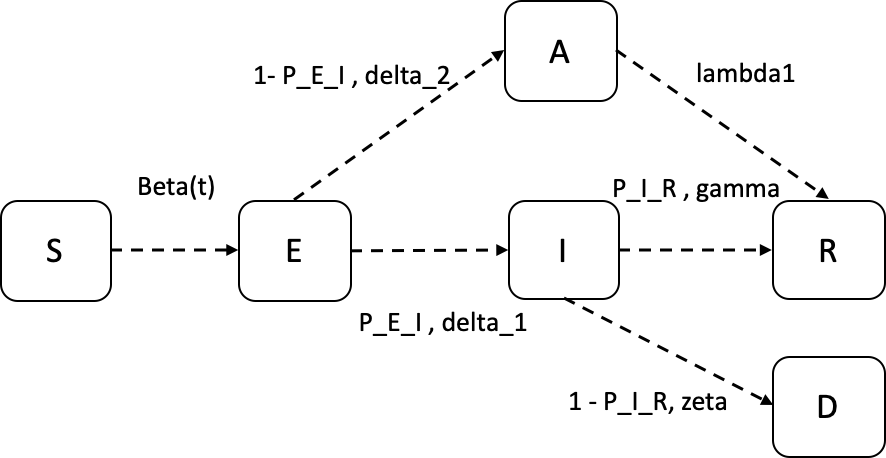

In [9]:
def epi_model_asym(init, t, population, beta, gamma, P_E_I, delta_1, delta_2, lambda_1, zeta, alpha_0):
    
    S, E, I, A, R, D = init
    
    infected_factor = 1.0
    
    def fatality_rate(t):
    
        '''
        The fatality rate depends on the following parameters (to be extended): 
         - The proportion of infected people at time t
         - The proportion of vulnerable population

        Parameters:
        ----------
          fatality_opt: optimal fatality rate, when Infected population is min
          m: parameter that controls the influence of the infected populattion on the fatality rate
          I(t): Infected population at time t
          N: overall population
        '''
    
        return alpha_0 + infected_factor * I / N
    
    
    dSdt = - beta(t) * I * S/population
    
    dEdt =   beta(t) * I * S/population - P_E_I * delta_1 * E - (1 - P_E_I) * delta_2 * E
    
    dIdt =   P_E_I * delta_1 * E -  (1 - fatality_rate(t)) * gamma * I - fatality_rate(t) * zeta * I
    
    dAdt =  (1 - P_E_I) * delta_2 * E - lambda_1 * A
    
    dRdt =  (1 - fatality_rate(t)) * gamma * I + lambda_1 * A
    
    dDdt =  fatality_rate(t) * zeta * I
    
    return dSdt , dEdt, dIdt, dAdt, dRdt, dDdt



In [ ]:
## gamma: the recovery rate (1/ number of days from Infected to Recovered)
## beta(t) : number of people that get infected per day by an infected person 
## delta_1: transmission rate from E to A (1/incubation period)
## delta_2: transmission rate from E to I (1/incubation period)
## lambda_1: recovery rate from rate of asymptomatic patients
## zeta: the death rate


############## DO NOT CHANGE ##############
##########################################

gamma = 1 / 9

delta_1, delta_2 = 1 / 5, 1 / 5

lambda_1 = 1 / 6.5

zeta = 1 / 7.5

###########################################
#########################################

N = demographics[demographics['province']=='Brussels']['total_population'].unique()[0]

print(N)

## Parameters to fit: P_I_C , P_C_R, R0_start, R0_end , x0, k

def Model(days, R0_init, R0_end, P_E_I, x0, k):
    
    def beta(t):

        reproduction_rate = (R0_init - R0_end)/(1 + np.exp(-k * (-t + x0))) +  R0_end

        return reproduction_rate * gamma

    S0, E0, I0, A0, R0, D0 = N - 1 , 0, 1 , 0.85, 0, 0

    y_0 = S0, E0, I0, A0, R0, D0

    t = np.linspace(0, days, days)
    
    model_integ = odeint(epi_model_asym, y_0, t , args = (N, beta, gamma, P_E_I, delta_1, delta_2, lambda_1, zeta, alpha_0))

    S, E, I, A, R, D = model_integ.T
    
    return t, S, E, I, A, R, D


params_grid = {'R0_init': (2, 1, 5) , 
               
               'R0_end': (0.9, 0.3, 3.5) ,
               
               'P_E_I': (0.4, 0.2, 0.7) , 
                
               'x0': (30, 0, 100) ,
              
               'k': (0.5, 0.1, 3) }


def model_fitter(x, R0_init, R0_end, P_E_I, x0, k):
    
    ret = Model(len(data), R0_init, R0_end, P_E_I, x0, k)
    
    return ret[4][x]



In [18]:
def plot_model(t, S, E, I, A, R, D, title):
    
    fig = plt.figure(facecolor = 'w')

#     plt.plot(t, S/1000, 'b', alpha=0.5, lw=2, label = 'Susceptible')
    
    plt.plot(t, E/1000, 'y', alpha=0.5, lw=2, label = 'Exposed')

    plt.plot(t, I/1000, 'o', alpha=0.5, lw=2, label = 'Infected')
    
    plt.plot(t, A/1000, '-', alpha=0.5, lw=2, label = 'Asymptomatic')

    plt.plot(t, R/1000, 'g', alpha=0.5, lw=2, label = 'Recovered')
    
    plt.plot(t, D/1000, 'r', alpha=0.5, lw=2, label = 'Deceased')

    plt.xlabel('Time /days')

    plt.ylabel('Number (1000s)')

    # plt.ylim(0 ,1.2)

    # plt.yaxis.set_tick_params(length=0)

    # plt.xaxis.set_tick_params(length=0)

    plt.grid(b = True, which = 'major', c = 'w', lw = 2, ls = '-')

    plt.legend(loc = 'upper right')

    plt.title(title)

    plt.show()

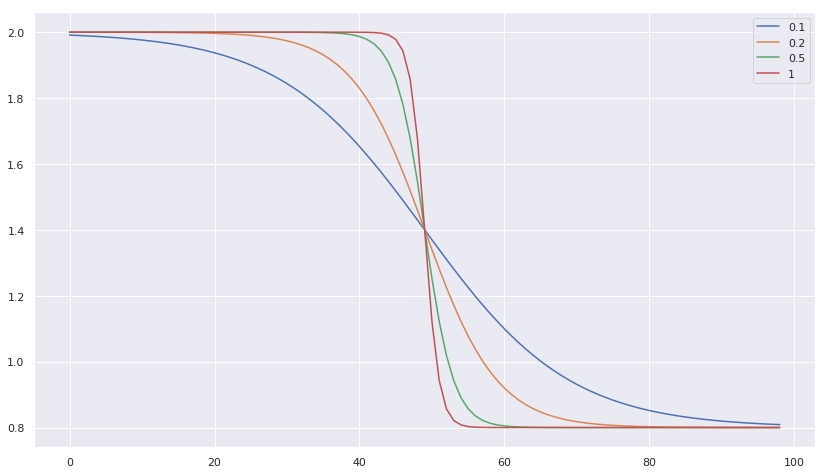

In [17]:
## Sanity Check 

t = np.arange(1, 100)

R0_init = 2

R0_end = 0.8

x0 = 50

for k in [0.1, 0.2, 0.5, 1]:

    plt.plot(reproduction_rate(t), label = k)
    
    plt.legend(loc = 'upper right')


In [19]:
# num_deaths_agg = num_deaths[['DATE', 'REGION', 'DEATHS']].groupby(['DATE', 'REGION'])['DEATHS'].sum().reset_index()

# num_deaths_agg = num_deaths_agg[:-5]

# # num_deaths_agg = num_deaths_agg.merge(count_hosp_icu, left_on = ['DATE', 'REGION'], right_on = ['DATE', 'REGION'], how = 'left')

# # num_deaths_agg.fillna(0., inplace = True)

# # num_deaths_agg = num_deaths_agg.melt(id_vars = ['DATE', 'REGION'], value_vars = ['DEATHS', 'TOTAL_IN_ICU'],value_name = 'CASES')

# # num_deaths_agg.head()

# ax = sns.lineplot(x = "DATE", y = "DEATHS", data = num_deaths_agg, hue = 'REGION')

# plt.xticks(rotation=45, horizontalalignment='right',  fontweight='light')

# plt.title("Deaths By Date and Regions")

In [13]:
from datetime import datetime, timedelta

import matplotlib.dates as mdates

T0 = datetime.strptime(hosp_total_in_brussels['DATE'].min(), '%Y-%m-%d')

T0

datetime.datetime(2020, 3, 15, 0, 0)

###  Model with Asymptomatic and Hospitalized patients

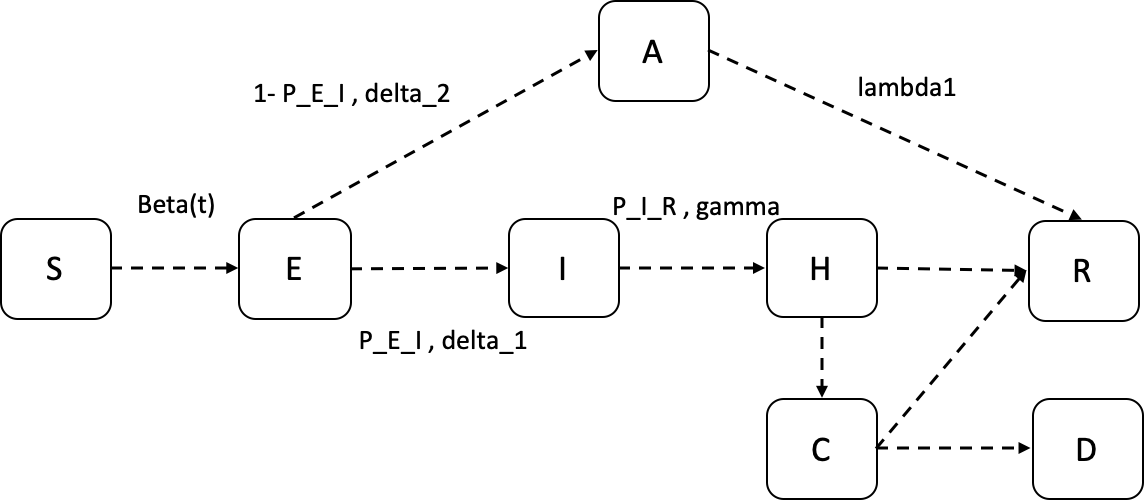

In [1]:
def plot_model(t, S, E, I, C, R, D, time_shift, R0_init, R0_end, k, x0, title):
    
    fig = plt.figure(facecolor = 'w')
    
    current_datetime = datetime.now()

    T0_start = T0 - timedelta(days=time_shift)
    
    T0_end = T0_start + timedelta(days=t)
    
    dates = []
    
    for i in range(t):
        
        dates.append(T0_start + timedelta(days=i))
    
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

#     plt.plot(dates, S, 'b', alpha=0.5, lw=2, label = 'Susceptible')
    
    plt.plot(dates, E, 'y', alpha=0.5, lw=2, label = 'Exposed')

    plt.plot(dates, I, 'o', alpha=0.5, lw=2, label = 'Infected')
    
    plt.plot(dates, C, 'o', alpha=0.5, lw=2, label = 'Hospitalized')

    plt.plot(dates, R, 'g', alpha=0.5, lw=2, label = 'Recovered')
    
    plt.plot(dates, D, 'r', alpha=0.5, lw=2, label = 'Deceased')
    
    plt.legend(loc = 'best')
    
    plt.gcf().autofmt_xdate()

    plt.xlabel('Time /days')

    plt.ylabel('Number (1000s)')

    # plt.ylim(0 ,1.2)

    # plt.yaxis.set_tick_params(length=0)

    # plt.xaxis.set_tick_params(length=0)

    plt.grid(b = True, which = 'major', c = 'w', lw = 2, ls = '-')
    
    ## Add Today Vertical Line
    
    plt.axvline(current_datetime,  linestyle='--')
    
    ## Add Policy Intervention
    
    policy = []
    
    for t0 in range(t):
        
        policy.append((R0_init - R0_end)/(1 + np.exp(-k * (-t0 + x0))) +  R0_end)
    
    plt.plot(dates, policy)

    plt.title(title)

    plt.show()
    

def plot_ci(t, S, E, I, H, R, D, time_shift, R0_init, R0_end, k, x0, title):
    
    fig, ax1 = plt.subplots()
    
    policy = []
    
    for t0 in range(t):
         
        policy.append((R0_init - R0_end)/(1 + np.exp(-k * (-t0 + x0))) +  R0_end)
    
    current_datetime = datetime.now()

    T0_start = T0 - timedelta(days=time_shift )
    
    T0_end = T0_start + timedelta(days=t)
    
    dates = []
    
    for i in range(t):
        
        dates.append(T0_start + timedelta(days=i))
    
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

    plt.plot(dates, S, 'b', alpha=0.5, lw=2, label = 'Susceptible')
    
    plt.plot(dates, E, 'y', alpha=0.5, lw=2, label = 'Exposed')

    ax1.plot(dates, I,  alpha=0.5, lw=2, label = 'Infected', color = 'y')
    
    ax1.plot(dates, H,  alpha=0.5, lw=2, label = 'Hospitalized', color = 'b')

    ax1.plot(dates, R,  alpha=0.5, lw=2, label = 'Recovered', color = 'g')
    
    ax1.plot(dates, D,  alpha=0.5, lw=2, label = 'Deceased', color = 'r')
    
    S_lower, E_lower, I_lower, H_lower, R_lower, D_lower = S * 0.95, E * 0.95, I * 0.95, H * 0.95, R * 0.95, D * 0.95 

    S_upper, E_upper, I_upper, H_upper, R_upper, D_upper = S * 1.05, E * 1.05, I * 1.05, H * 1.05, R * 1.05, D * 1.05 
    
    ax1.fill_between(dates, H_lower, H_upper, color='b', alpha=.5)

    ax1.fill_between(dates, D_lower, D_upper, color='r', alpha=.5)

    ax1.fill_between(dates, R_lower, R_upper, color='g', alpha=.5)

    ax1.fill_between(dates, I_lower, I_upper, color='y', alpha=.5)
     
    plt.gcf().autofmt_xdate()
    
    plt.ylabel('Number')
    
    plt.legend(loc = 'best')
    
    ax2 = ax1.twinx()
    
    ax2.set_ylabel('R0', color='r')
    
    ax2.plot(dates, policy, linestyle='--', color = 'k')

    plt.xlabel('Time /days')

    # plt.ylim(0 ,1.2)

    # plt.yaxis.set_tick_params(length=0)

    # plt.xaxis.set_tick_params(length=0)

    plt.grid(b = True, which = 'major', c = 'w', lw = 2, ls = '-')
    
    ## Add Today Vertical Line
    
    plt.axvline(current_datetime,  linestyle='--')

    plt.title(title)

    plt.show()

In [2]:
## gamma: the recovery rate (1/ number of days from Infected to Recovered)
## beta : number of people that get infected per day by an infected person 
## delta_1: transmission rate from E to A (1/incubation period)
## delta_2: transmission rate from E to I
## gamma_0: hospitalization rate
## gamma_1: recovery rate from A
## lambda_1: the recovery from hospitalisation
## lamda_2: the death rate

gamma_0 = 1 / 12

delta_1, delta_2 = 1 / 5, 1 / 5

lambda_1 = 1 / 6.5

lambda_2 = 1 / 7.5

N = demographics[demographics['province']=='Brussels']['total_population'].unique()[0]

print(N)

gamma = 1 / 9

delta = 1 / 5

R0_init = 2.3

R0_end = 1

k = 0.3

x0 = 30

## Parameters to fit: P_I_C , P_C_R, R0_start, R0_end , x0, k


def reproduction_rate(t, R0_init, R0_end, k, x0):
    
    ## modelling the lockdown effect on the reproduction rate with a logistic function
    '''
    Parameters:
    -----------
        R0_init: the initial reproduction rate
        R0_end: the final reproduction rate
        k: the strength of the decrease post lockdown
        x0: the date of steepest decline in the reproduction rate (the lockdown is enforced globally)
    '''
    
    return (R0_init - R0_end)/(1 + np.exp(-k * (-t + x0))) +  R0_end


def epi_hosp_model(init, t, population, beta, gamma_0, gamma, delta, lambda_1, lambda_2, P_I_H , P_H_D):
    
    S, E, I, H, R, D = init
        
    dSdt = - beta(t) * I * S/population
    
    dEdt =   beta(t) * I * S/population - delta * E
    
    dIdt =   delta * E -  (1 - P_I_H) * gamma * I - P_I_H * gamma_0 * I
    
    dHdt =   P_I_H * gamma_0 * I - (1 - P_H_D) * H * lambda_1 - P_H_D * H * lambda_2
        
    dRdt =   (1 - P_H_D) * H * lambda_1 + (1 - P_I_H) * gamma * I
    
    dDdt =    P_H_D * H * lambda_2
    
    return dSdt, dEdt, dIdt, dHdt, dRdt, dDdt


def Model(days, R0_init, R0_end,  P_I_H , P_H_D, x0, k):
    
    def beta(t):

        reproduction_rate = (R0_init - R0_end)/(1 + np.exp(-k * (-t + x0))) +  R0_end

        return reproduction_rate * gamma

    S0, E0, I0, H0, R0, D0 = N - 1 , 0, 1 , 0, 0, 0

    y_0 = S0, E0, I0, H0, R0, D0

    t = np.linspace(0, days, days)
    
    model_integ = odeint(epi_hosp_model, y_0, t , args = (N, beta, gamma_0, gamma, delta, lambda_1, lambda_2, P_I_H , P_H_D))

    S, E, I, H, R, D = model_integ.T
    
    return t, S, E, I, H, R, D


params_grid = {'R0_init': (2, 1, 5) , 
               
               'R0_end': (0.9, 0.3, 3.5) ,
               
               'P_I_H': (0.4, 0.2, 0.7) , 
              
               'P_H_D': (0.1, 0.05, 0.2), 
                
               'x0': (30, 0, 100) ,
              
               'k': (0.5, 0.1, 3) }


def model_fitter(x, R0_init, R0_end,  P_I_H , P_H_D, x0, k):
    
    ret = Model(len(data), R0_init, R0_end,  P_I_H , P_H_D, x0, k)
    
    return ret[4][x]


NameError: name 'demographics' is not defined

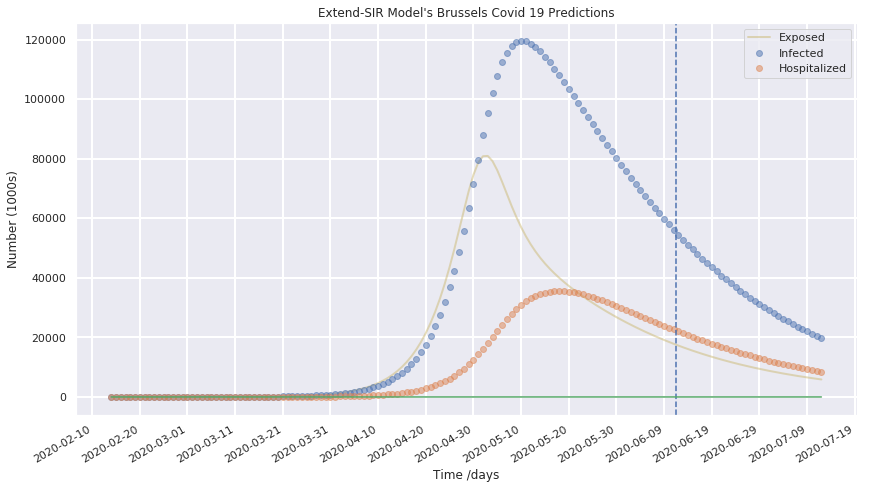

In [30]:
t, S, E, I, H, R, D = Model(150, 4, 0.8, 0.6, 0.1, 78, 0.5)

plot_model(150, S, E, I, H, R, D, 30, 3, 0.8, 0.4, 90, 'Extend-SIR Model\'s Brussels Covid 19 Predictions')

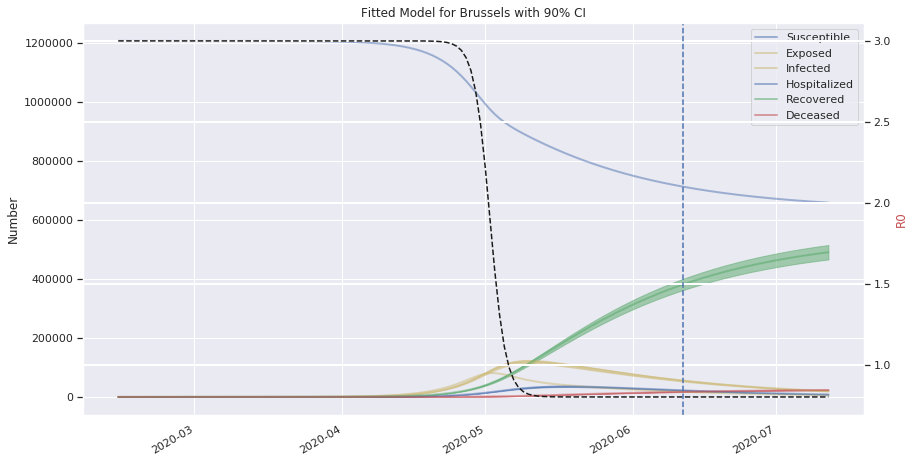

In [17]:
plot_ci(150, S, E, I, H, R, D, 30, 3, 0.8, 0.6, 78, 'Fitted Model for Brussels with 90% CI')


In [29]:
x0 = 90

### Fitting to Hospitalization Data

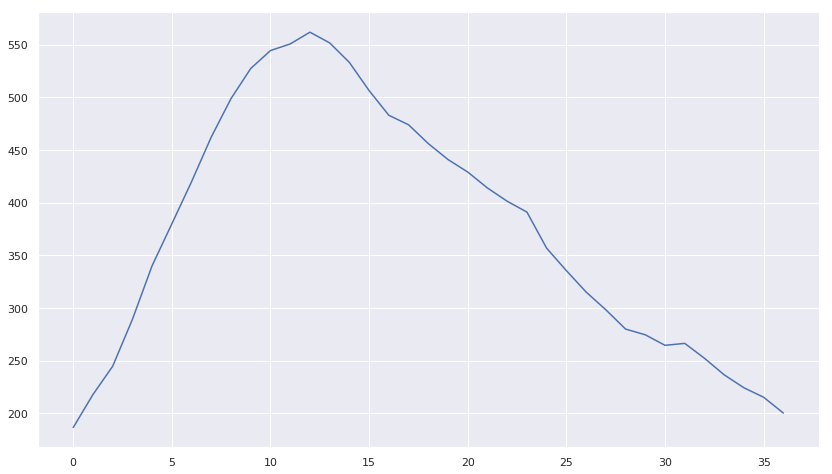

In [39]:
def moving_avg(time_series, window):
    
    smoothed = []
    
    for i in range(window, len(time_series) - window + 1):
        
        smoothed.append(time_series[i - window : i].mean())
    
    return smoothed

smoothed_ts = moving_avg(count_new_in['NEW_IN'].values, 7)

plt.plot(smoothed_ts)

In [ ]:
smoothed_ts_cases = moving_avg(count_cases_reg['CASES'].values,10)


plt.plot(smoothed_ts_cases)

In [58]:
hosp_total_in_brussels.head()

,DATE,TOTAL_IN
0,2020-03-15,58
1,2020-03-16,81
2,2020-03-17,115
3,2020-03-18,124
4,2020-03-19,156


In [40]:
data =  hosp_total_in_brussels['TOTAL_IN'].values

data = np.concatenate((np.zeros(30), data))

x_data = np.linspace(0, len(data) - 1, len(data), dtype=int)


In [41]:
# data = num_deaths_agg[num_deaths_agg['REGION']=='Brussels']['DEATHS'].values

model  = lmfit.Model(model_fitter)

for kargs , (init, min_ , max_) in params_grid.items():
    
    model.set_param_hint(str(kargs), value = init, min = min_, max = max_, vary = True)

params = model.make_params()

fit_method = 'differential_evolution'

result = model.fit(data, params, method = fit_method, x = x_data)

print(result.fit_report())

[[Model]]
    Model(model_fitter)
[[Fit Statistics]]
    # fitting method   = differential_evolution
    # function evals   = 4525
    # data points      = 80
    # variables        = 6
    chi-square         = 491072.891
    reduced chi-square = 6636.12014
    Akaike info crit   = 709.785697
    Bayesian info crit = 724.077857
[[Variables]]
    R0_init:  5.00000000 +/- 7.4604e-18 (0.00%) (init = 2)
    R0_end:   0.39597170 +/- 0.03533928 (8.92%) (init = 0.9)
    P_I_H:    0.70000000 +/- 2.0645e-18 (0.00%) (init = 0.4)
    P_H_D:    0.20000000 +/- 7.4373e-18 (0.00%) (init = 0.1)
    x0:       42.4992987 +/- 0.17615957 (0.41%) (init = 30)
    k:        2.99999997 +/- 1.2706e-16 (0.00%) (init = 0.5)
[[Correlations]] (unreported correlations are < 0.100)
    C(R0_end, x0) = -0.861


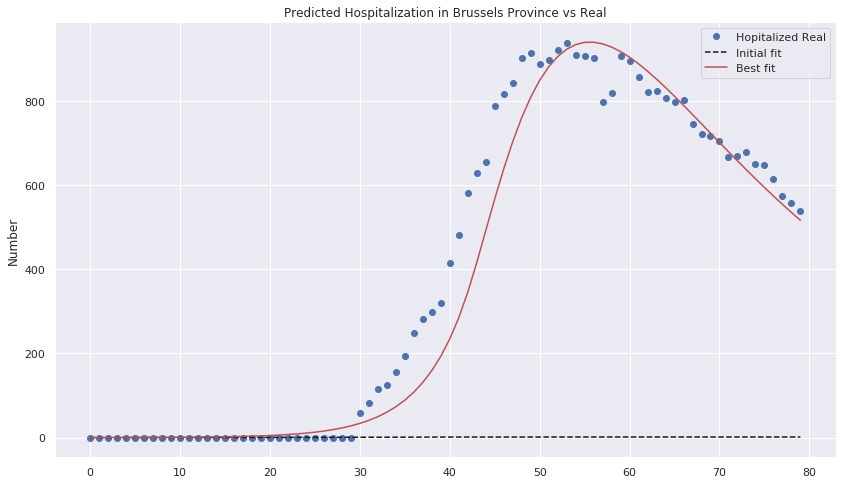

In [53]:


plt.plot(x_data, data, 'bo', label = 'Hopitalized Real')

plt.plot(x_data, result.init_fit, 'k--', label='Initial fit')

plt.plot(x_data, result.best_fit, 'r-', label='Best fit')

plt.legend(loc='best')



#     ax1.fill_between(dates, R_lower, R_upper, color='g', alpha=.5)

#     ax1.fill_between(dates, I_lower, I_upper, color='y', alpha=.5)
     
plt.ylabel('Number')
    
plt.legend(loc = 'best')

plt.title("Predicted Hospitalization in Brussels Province vs Real")

plt.show()


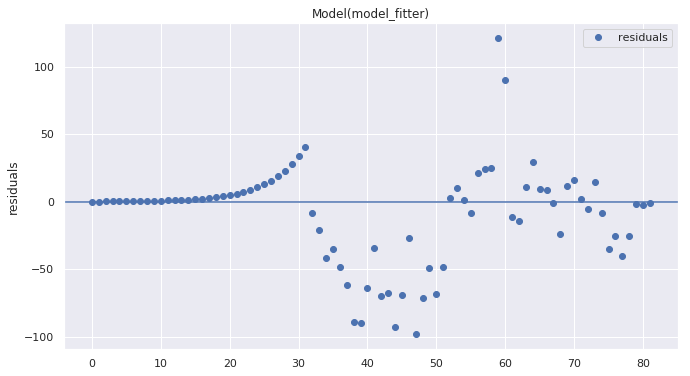

In [119]:
result.plot_residuals(x_data)

In [239]:
t, S, E, I, H, R, D = Model(100, **result.best_values)

In [245]:
# plot_model(100, S, E, I, H, R, D, 22, 'Fitted Model Brussels Projections')

In [130]:
def residuals(ps, days, data):
    
    R0_init = ps['R0_init'].value
    
    R0_end = ps['R0_end'].value
    
    P_I_H = ps['P_I_H'].value
    
    P_H_D = ps['P_H_D'].value
    
    x0 = ps['x0'].value
    
    k = ps['k'].value
    
    model = Model(days, R0_init, R0_end,  P_I_H , P_H_D, x0, k)
    
    return (model - data).ravel()

for kargs , (init, min_ , max_) in params_grid.items():
    
    model.set_param_hint(str(kargs), value = init, min = min_, max = max_, vary = True)

params = model.make_params()

days = len(data)

mini = lmfit.Minimizer(residuals, params, fcn_args=(days, data))

result = mini.minimize()

print(lmfit.fit_report(result.params))


[[Variables]]
    R0_init:  5.00000000 (init = 2)
    R0_end:   2.85619421 (init = 0.9)
    P_I_H:    0.70000000 (init = 0.4)
    P_H_D:    0.19999994 (init = 0.1)
    x0:       72.6608334 (init = 30)
    k:        2.96598253 (init = 0.5)


In [131]:
for p in result.params:
    
    result.params[p].stderr = abs(result.params[p].value * 0.1)

In [132]:
ci = lmfit.conf_interval(mini, result)

lmfit.printfuncs.report_ci(ci)

/opt/conda/envs/Python36/lib/python3.6/site-packages/lmfit/confidence.py:312: UserWarning: Bound reached with prob(R0_init=5) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/conda/envs/Python36/lib/python3.6/site-packages/lmfit/confidence.py:327: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(R0_end=2.5705747926092553) = 0.0 < max(sigmas).
  warn(errmsg)
/opt/conda/envs/Python36/lib/python3.6/site-packages/lmfit/confidence.py:312: UserWarning: Bound reached with prob(R0_end=3.5) = 0.2545920925348518 < max(sigmas)
  warn(errmsg)
/opt/conda/envs/Python36/lib/python3.6/site-packages/lmfit/confidence.py:312: UserWarning: Bound reached with prob(P_I_H=0.7) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/conda/envs/Python36/lib/python3.6/site-packages/lmfit/confidence.py:312: UserWarning: Bound reached with prob(P_H_D=0.05) = 0.5643278620236041 < max(sigmas)
  warn(errmsg)
/opt/conda/envs/Python36/lib/python3.6/site-packages/lmfit/confidence.py:312: UserWarning: Bound reached with prob(P_H_D=0.

            99.73%    95.45%    68.27%    _BEST_    68.27%    95.45%    99.73%
 R0_init:  -0.12383  -0.05652  -0.01435   5.00000      +inf      +inf      +inf
 R0_end :      -inf      -inf      -inf   2.85619      +inf      +inf      +inf
 P_I_H  :  -0.24490  -0.11113  -0.02821   0.70000      +inf      +inf      +inf
 P_H_D  :      -inf      -inf      -inf   0.20000      +inf      +inf      +inf
 x0     :  -9.47024  -6.71831  -3.76804  72.66083      +inf      +inf      +inf
 k      :  -2.86486  -2.80887  -2.66401   2.96598      +inf      +inf      +inf


/opt/conda/envs/Python36/lib/python3.6/site-packages/lmfit/confidence.py:312: UserWarning: Bound reached with prob(k=3) = 0.0 < max(sigmas)
  warn(errmsg)


In [136]:
result.best_values

{'R0_init': 5.0,
 'R0_end': 0.4594182382866096,
 'P_I_H': 0.7,
 'P_H_D': 0.2,
 'x0': 42.3081352523073,
 'k': 2.9999999710000003}

In [148]:
R0_init_upper

5.5

In [261]:
t, S, E, I, H, R, D = Model(100, **result.best_values)

S_lower, E_lower, I_lower, H_lower, R_lower, D_lower = S * 0.9, E * 0.9, I * 0.9, H * 0.9, R * 0.9, D * 0.9 

S_upper, E_upper, I_upper, H_upper, R_upper, D_upper = S * 1.1, E * 1.1, I * 1.1, H * 1.1, R * 1.1, D * 1.1 

In [40]:
# import matplotlib.pyplot as plt
# import matplotlib.patches as mpatches
# from matplotlib.colors import colorConverter as cc


# plt.plot(t, H)

# plt.plot(t, D)

# plt.plot(t, I, 'y')

# plt.fill_between(range(len(H)), H_lower, H_upper, color='b', alpha=.5)

# plt.fill_between(range(len(D)), D_lower, D_upper, color='r', alpha=.5)

# plt.fill_between(range(len(R)), R_lower, R_upper, color='g', alpha=.5)

# plt.fill_between(range(len(I)), I_lower, I_upper, color='y', alpha=.5)
 
# plt.show()

In [ ]:
plot_conf()

### Modeling Hospitalised and ICU Beds with Asymptomatic Compartment

In [ ]:
## gamma: the recovery rate (1/ number of days from Infected to Recovered)
## beta : number of people that get infected per day by an infected person 
## delta_1: transmission rate from E to A
## delta_2: transmission rate from E to I
## gamma_0: hospitalization rate
## gamma_1: recovery rate from A
## lambda_1: the recovery from hospitalisation
## lamda_2: the death rate

R0_init, R0_end, k, x0 = 2.3, 0.8, 0.5, 30

gamma = 1 / 9

delta_2 = 1 / 5

lambda_1 = 1 / 7

lambda_2 = 1 / 4.5

P_H_R = 0.48

N = demographics['total_population'].unique().sum()


In [ ]:
def epi_model_hosp(init, t, population, beta, delta_2, gamma, gamma_1, gamma_0, lambda_1, lambda_2, P_I_R, P_E_I):
    
    S, E, I, H, R, D = init 
    
    dSdt = - beta(t) * I * S/population
    
    dEdt =   beta(t) * I * S/population - P_E_I * delta_2 * E
        
    dIdt =  delta_2 * E -  P_I_R * gamma * I - (1 - P_I_R) * gamma_0 * I
    
#     dAdt =  (1 - P_E_I) * delta_1 * E - gamma_1 * A
    
#     dRdt =  P_I_R * gamma * I + lambda_1 * H * P_H_R + gamma_1 * A 

    dRdt =  P_I_R * gamma * I + lambda_1 * H * P_H_R
    
    dHdt = (1 - P_I_R) * gamma_0 * I - lambda_1 * H * P_H_R
    
    dDdt =  (1 - P_H_R) * lambda_2 * H
    
    return dSdt, dEdt, dIdt, dRdt, dHdt, dDdt


def Model(days, gamma_1, gamma_0, P_I_R, P_E_I):

    ## Define a Time Dependent beta rate (R0)
    
    def beta(t):

        reproduction_rate = (R0_init - R0_end)/(1 + np.exp(-k * (-t + x0))) +  R0_end

        return reproduction_rate * gamma

    S0, E0, I0, R0, H0, D0 = N - 1 , 1, 0 , 0, 0, 0

    y_0 = S0, E0, I0, R0, H0, D0

    t = np.linspace(0, days, days)

    model_integ = odeint(epi_model_hosp, y_0, t , args = (N, beta, delta_2, gamma, gamma_1, gamma_0, lambda_1, lambda_2, P_I_R, P_E_I))

    S, E, I, R, H, D = model_integ.T
    
    return t, S, E, I, R, H, D


def model_fitter(x, gamma_1, gamma_0, P_I_R, P_E_I):
    
    ret = Model(len(data), gamma_1, gamma_0, P_I_R, P_E_I)
    
    return ret[7][x]


In [ ]:
t, S, E, I, R, H, D = Model(500, 0.2, 1/7, 0.5, 0.2)

def plot_model(t, S, E, I, R, H, D):
    
    fig = plt.figure(facecolor = 'w')

    plt.plot(t, S/1000, 'b', alpha=0.5, lw=2, label = 'Susceptible')
    
    plt.plot(t, E/1000, 'y', alpha=0.5, lw=2, label = 'Exposed')

    plt.plot(t, I/1000, 'o', alpha=0.5, lw=2, label = 'Infected')

    plt.plot(t, R/1000, 'g', alpha=0.5, lw=2, label = 'Recovered')
    
    plt.plot(t, H/1000, 'g', alpha=0.5, lw=2, label = 'Hospitalized')
    
    plt.plot(t, D/1000, 'r', alpha=0.5, lw=2, label = 'Dead')

    plt.xlabel('Time /days')

    plt.ylabel('Number (1000s)')

    # plt.ylim(0 ,1.2)

    # plt.yaxis.set_tick_params(length=0)

    # plt.xaxis.set_tick_params(length=0)

    plt.grid(b = True, which = 'major', c = 'w', lw = 2, ls = '-')

    plt.legend(loc = 'upper right')

plot_model(t, S, E, I, R, H, D)

In [1]:
!pip install folium

     |████████████████████████████████| 102kB 7.8MB/s ta 0:00:011


In [84]:
import folium


m = folium.Map(location=[50.5010709, 4.4764])

